In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras

In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train_all, y_train_all), (x_test, y_test) = fashion_mnist.load_data()
x_valid, x_train = x_train_all[:5000], x_train_all[5000:]
y_valid, y_train = y_train_all[:5000], y_train_all[5000:]

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(
    x_train.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)
x_valid_scaled = scaler.transform(
    x_valid.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)
x_test_scaled = scaler.transform(
    x_test.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)

In [7]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(loss="sparse_categorical_crossentropy",
              optimizer = keras.optimizers.SGD(0.001),
              metrics = ["accuracy"])

In [15]:
# 回调函数/可视化
# 创建callbacks文件夹并加入系统搜索路径
logdir = './callbacks'
if not os.path.exists(logdir):
    os.mkdir(logdir)
output_model_file = os.path.join(logdir, 'fashion_mnist_model.h5')

# 指定回调函数
callbacks = [
    keras.callbacks.TensorBoard(logdir),
    keras.callbacks.ModelCheckpoint(output_model_file,
                                   save_best_only=True),
    keras.callbacks.EarlyStopping(patience=5, min_delta=1e-3),
]

# 对模型进行训练
history = model.fit(x_train_scaled, y_train, epochs=70, 
                   validation_data=(x_valid_scaled, y_valid),
                   callbacks=callbacks)

Epoch 1/70
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2469 - accuracy: 0.9138 - val_loss: 0.3088 - val_accuracy: 0.8910
Epoch 2/70
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2452 - accuracy: 0.9140 - val_loss: 0.3104 - val_accuracy: 0.8906
Epoch 3/70
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2439 - accuracy: 0.9145 - val_loss: 0.3084 - val_accuracy: 0.8922
Epoch 4/70
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2422 - accuracy: 0.9154 - val_loss: 0.3073 - val_accuracy: 0.8916
Epoch 5/70
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2407 - accuracy: 0.9159 - val_loss: 0.3062 - val_accuracy: 0.8906
Epoch 6/70
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2391 - accuracy: 0.9173 - val_loss: 0.3083 - val_accuracy: 0.8928
Epoch 7/70
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2376 - accuracy: 0.9170 - val_loss: 0.3074 - val_accuracy:

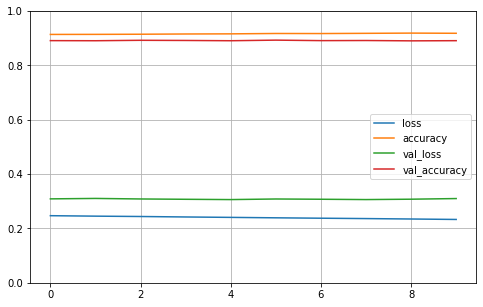

In [16]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()

plot_learning_curves(history)

In [17]:
model.evaluate(x_test_scaled, y_test, verbose=0)

[0.3411165177822113, 0.8791999816894531]